In [21]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sb
import statistics 
#import folium
import os
from datetime import datetime

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
Listings = pd.read_csv('/Users/yosrabahri/Documents/AMI/Airbnb_Munich/listings (3).csv')
Listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36720,"Beautiful 2 rooms flat, Glockenbach",158413,Gabriela,NaN,Ludwigsvorstadt-Isarvorstadt,48.13057,11.56929,Entire home/apt,95,2,25,2017-07-22,0.34,1,0
1,49309,Sublet - Apartment with Balcony in Downtown (1),224802,Damien,NaN,Ludwigsvorstadt-Isarvorstadt,48.12456,11.55567,Private room,40,14,40,2017-10-15,0.34,1,330
2,97945,Deluxw-Apartm. with roof terrace,517685,Angelika,NaN,Hadern,48.11476,11.48782,Entire home/apt,80,2,131,2019-10-03,1.24,2,59
3,114695,Apartment Munich/East with sundeck,581737,Stephan,NaN,Berg am Laim,48.11923,11.63726,Entire home/apt,95,2,53,2019-10-06,0.49,2,117
4,127383,City apartment next to Pinakothek,630556,Sonja,NaN,Maxvorstadt,48.15198,11.56486,Entire home/apt,120,2,84,2020-03-01,0.77,2,0


In [22]:
Listings.shape

(11128, 16)

In [25]:
prices_reviews = Listings.groupby(by = 'neighbourhood', as_index=False).agg({'price':'mean','reviews_per_month':'mean', 'id':'count'}).sort_values(by='neighbourhood', ascending = False)
prices_reviews.head(10)

,neighbourhood,price,reviews_per_month,id
24,Untergiesing-Harlaching,98.902941,0.520076,340
23,Tudering-Riem,155.804636,0.838053,302
22,Thalkirchen-Obersendling-Forstenried-Fürstenri...,100.301980,0.611365,404
21,Sendling-Westpark,110.613577,0.466516,383
20,Sendling,114.029478,0.532820,441
19,Schwanthalerhöhe,134.630588,0.528931,425
18,Schwabing-West,108.276570,0.522424,828
17,Schwabing-Freimann,104.109272,0.716977,604
16,Ramersdorf-Perlach,82.430622,0.979451,418
15,Pasing-Obermenzing,100.737778,0.632156,225


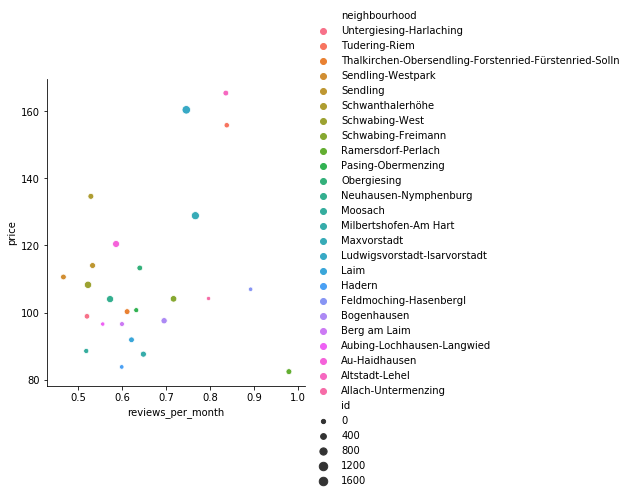

In [27]:
plot = sb.relplot(x="reviews_per_month", y="price", size = "id", hue = "neighbourhood", data = prices_reviews)

In [28]:
price_nights = Listings.groupby(by='room_type').agg({'price':'mean', 'minimum_nights':'mean'}).sort_values(by = 'price', ascending = False)
price_nights

,price,minimum_nights
room_type,,
Hotel room,242.311688,3.662338
Entire home/apt,135.568294,7.846716
Shared room,94.458101,2.201117
Private room,88.553786,3.080515


In [29]:
neigh = Listings.groupby(by = 'neighbourhood').agg({'id':'count', 'price':'mean'}).sort_values(by = 'price', ascending = True)
neigh

,id,price
neighbourhood,,
Ramersdorf-Perlach,418,82.430622
Hadern,135,83.829630
Milbertshofen-Am Hart,462,87.632035
Moosach,249,88.582329
Laim,384,91.911458
Aubing-Lochhausen-Langwied,88,96.602273
Berg am Laim,211,96.606635
Bogenhausen,510,97.586275
Untergiesing-Harlaching,340,98.902941


In [39]:
Listings['last_review']=pd.to_datetime(Listings['last_review'])
Listings['month'] = Listings['last_review'].dt.strftime('%b')
Listings.month.head(10)

0    Jul
1    Oct
2    Oct
3    Oct
4    Mar
5    NaT
6    Apr
7    Mar
8    Feb
9    Mar
Name: month, dtype: object

In [41]:
Listings['last_review']=pd.to_datetime(Listings['last_review'])
months_in_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Listings['Year'] = Listings['last_review'].dt.strftime('%Y')
Listings["month"] = Listings["last_review"].dt.strftime('%b')
review_count = Listings.groupby(by=["Year", "month"]).size().reset_index()
review_count.columns= ['Year','month','reviews']
reviews_pivoted = review_count[review_count['Year']>'2015'].pivot(index='month', columns='Year', values='reviews').reindex(months_in_order)
reviews_pivoted2 = reviews_pivoted.iloc[:,:-2]
reviews_pivoted2

Year,2016,2017,2018,2019
month,,,,
Jan,24.0,22.0,62.0,84.0
Feb,7.0,15.0,33.0,46.0
Mar,21.0,8.0,37.0,64.0
Apr,53.0,23.0,62.0,238.0
May,18.0,32.0,61.0,100.0
Jun,29.0,31.0,54.0,144.0
Jul,32.0,33.0,50.0,124.0
Aug,37.0,50.0,80.0,200.0
Sep,90.0,185.0,216.0,577.0


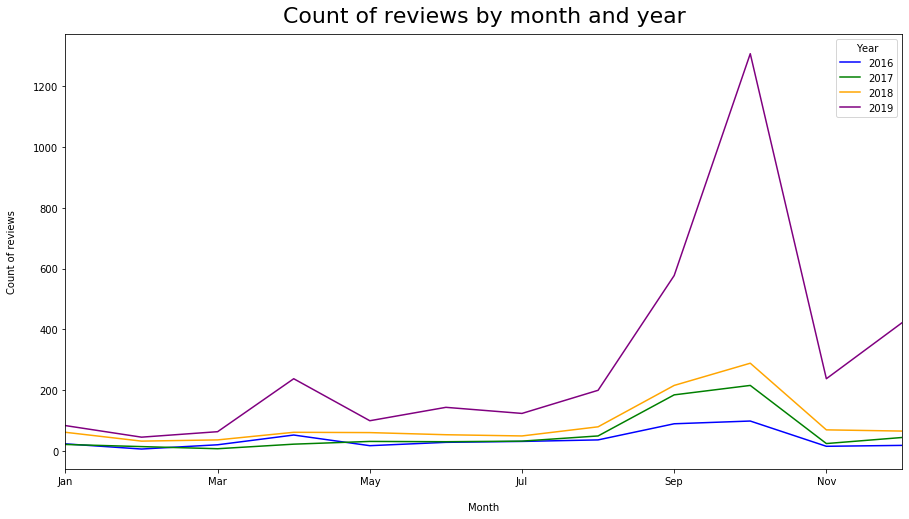

In [27]:
reviews_pivoted2.plot(kind='line', figsize=(15,8), color=['blue', 'green', 'orange', 'purple', 'black'])
plt.title("Count of reviews by month and year", y=1.013, fontsize=22)
plt.xlabel("Month", labelpad=16)
plt.ylabel("Count of reviews", labelpad=16);  

# Reviews per Neighboorhood

In [48]:
rev_nb = Listings.groupby(by='neighbourhood').agg({'id':'count', 'number_of_reviews':'mean'}).sort_values(by='number_of_reviews', ascending=False).reset_index()
rev_nb

,neighbourhood,id,number_of_reviews
0,Feldmoching-Hasenbergl,114,21.824561
1,Maxvorstadt,1078,21.012059
2,Ramersdorf-Perlach,418,20.442584
3,Schwabing-Freimann,604,19.274834
4,Ludwigsvorstadt-Isarvorstadt,1215,18.146502
5,Tudering-Riem,302,17.900662
6,Bogenhausen,510,17.064706
7,Altstadt-Lehel,386,16.562176
8,Berg am Laim,211,16.317536
9,Obergiesing,379,15.290237


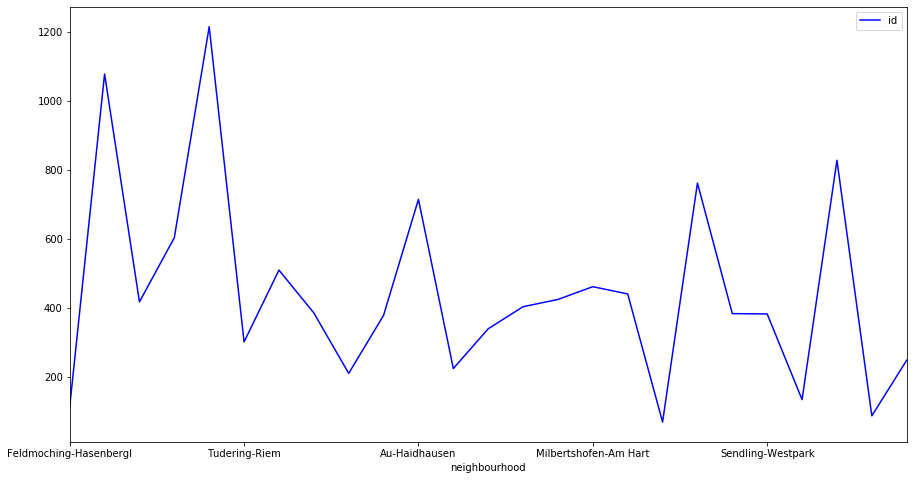

In [53]:
rev_nb.plot(kind='line', x='neighbourhood',y='id', figsize=(15,8), color=['blue', 'green', 'orange', 'purple', 'black'])
#neigh_plot = sb.barplot(neigh.index, neigh.id,)
#neigh_plot.set_xticklabels(neigh_plot.get_xticklabels(),rotation=90);

# Listings per Neighbourhood

In [44]:
neigh = Listings.groupby(by = 'neighbourhood').agg({'id':'count'}).sort_values(by = 'neighbourhood', ascending = False)
neigh

,id
neighbourhood,
Untergiesing-Harlaching,340
Tudering-Riem,302
Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln,404
Sendling-Westpark,383
Sendling,441
Schwanthalerhöhe,425
Schwabing-West,828
Schwabing-Freimann,604
Ramersdorf-Perlach,418


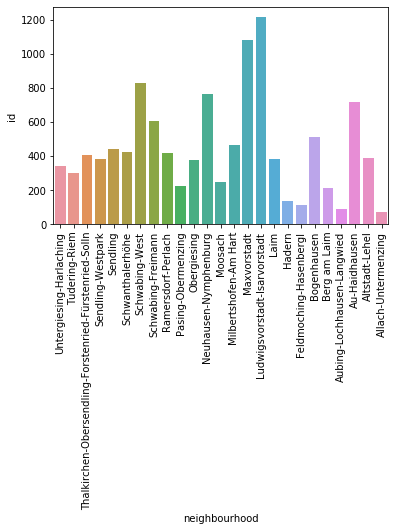

In [46]:
# plotting this on a graph

# Top 5 neighbourhoods
#neigh_head = neigh.head(5)

neigh_plot = sb.barplot(neigh.index, neigh.id,)
neigh_plot.set_xticklabels(neigh_plot.get_xticklabels(),rotation=90);

# Reviews and Price per Neighboorhood

In [37]:
rev_nb_p = Listings.groupby(by='neighbourhood').agg({'id':'count', 'number_of_reviews':'mean', 'price':'mean'}).sort_values(by='number_of_reviews', ascending=False).reset_index()
corrmatrix = rev_nb_p.corr()
corrmatrix

,id,number_of_reviews,price
id,1.000000,0.301475,0.424435
number_of_reviews,0.301475,1.000000,0.354085
price,0.424435,0.354085,1.000000


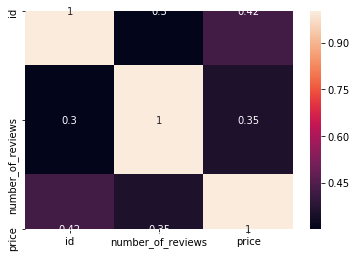

In [39]:
sb.heatmap(corrmatrix, annot = True);

In [32]:
reviews = pd.read_csv('/Users/yosrabahri/Documents/AMI/Airbnb_Munich/reviews (1).csv')
reviews.head()

,listing_id,date
0,36720,2014-05-09
1,36720,2014-05-20
2,36720,2014-07-25
3,36720,2014-07-27
4,36720,2014-09-13
